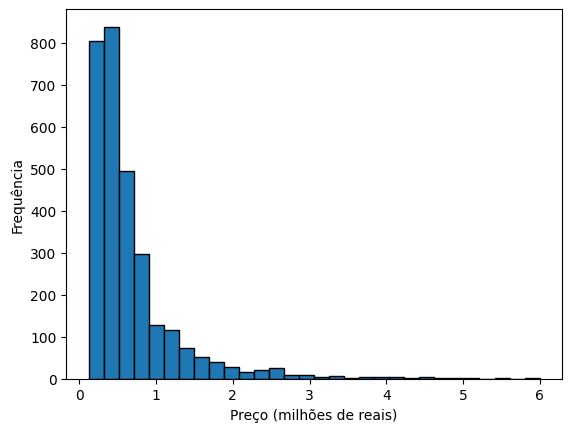

In [4]:
import matplotlib.pyplot as plt
from babel.numbers import format_currency
from matplotlib.ticker import FuncFormatter
import locale
# Configurar a formatação de moeda
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')  # Configurar a localização para o Brasil

def currency_formatter(value, _):
    return format_currency(value, 'BRL', locale='pt_BR')

# Função de formatação para valores monetários
def formatar_moeda(valor, _):
    return locale.format_string('%.0f', valor/1000000, grouping=True)

# Carregar o arquivo CSV com os dados dos imóveis
data = pd.read_csv('dataset_imoveis_new.csv')

# Extrair a coluna de preços dos imóveis
precos = data['preco']

# Plotar o histograma da frequência dos preços
plt.hist(precos, bins=30, edgecolor='black')

# Definir os rótulos dos eixos
plt.xlabel('Preço (milhões de reais)')
plt.ylabel('Frequência')

# Definir o título do gráfico
# plt.title('Frequência dos Preços dos Imóveis')

# Definir o formato dos rótulos dos eixos
plt.ticklabel_format(style='plain')

# Aplicar a formatação com moeda no eixo y
formatter = FuncFormatter(formatar_moeda)
plt.gca().xaxis.set_major_formatter(formatter)

# Exibir o gráfico resultante
plt.show()

In [26]:
import pandas as pd

# Ler o arquivo CSV
df = pd.read_csv('dataset_imoveis_new.csv')

# Percorrer todas as colunas e calcular os valores estatísticos
estatisticas = {}
for coluna in df.columns:
    valor_minimo = round(df[coluna].min(), 2)
    valor_maximo = round(df[coluna].max(), 2)
    media = round(df[coluna].mean(), 2)
    mediana = round(df[coluna].median(), 2)
    desvio_padrao = df[coluna].std()
    
    # Armazenar os valores em um dicionário
    estatisticas[coluna] = {'Mínimo': valor_minimo, 'Máximo': valor_maximo, 'Média': media, 'Mediana': mediana, 'desvio_padrao': desvio_padrao}

# Imprimir as estatísticas
for coluna, valores in estatisticas.items():
    print(f'Coluna: {coluna}')
    print(f'Mínimo: {valores["Mínimo"]:.2f}')
    print(f'Máximo: {valores["Máximo"]:.2f}')
    print(f'Média: {valores["Média"]:.2f}')
    print(f'Mediana: {valores["Mediana"]:.2f}')
    print(f'Desvio Padrão: {valores["desvio_padrao"]:.2f}')
    print('---')

Coluna: preco
Mínimo: 120000.00
Máximo: 6000000.00
Média: 662821.41
Mediana: 459000.00
Desvio Padrão: 620303.60
---
Coluna: area
Mínimo: 16.00
Máximo: 1090.00
Média: 112.52
Mediana: 92.00
Desvio Padrão: 71.81
---
Coluna: salas
Mínimo: 1.00
Máximo: 8.00
Média: 2.12
Mediana: 2.00
Desvio Padrão: 1.02
---
Coluna: quartos
Mínimo: 0.00
Máximo: 9.00
Média: 2.85
Mediana: 3.00
Desvio Padrão: 0.85
---
Coluna: suites
Mínimo: 0.00
Máximo: 8.00
Média: 0.83
Mediana: 1.00
Desvio Padrão: 0.76
---
Coluna: banheiros
Mínimo: 1.00
Máximo: 8.00
Média: 2.12
Mediana: 2.00
Desvio Padrão: 1.02
---
Coluna: andar
Mínimo: 0.00
Máximo: 34.00
Média: 3.91
Mediana: 3.00
Desvio Padrão: 3.55
---
Coluna: garagens
Mínimo: 0.00
Máximo: 9.00
Média: 1.63
Mediana: 1.00
Desvio Padrão: 0.97
---
Coluna: iptu
Mínimo: 20.00
Máximo: 2961.68
Média: 181.86
Mediana: 110.00
Desvio Padrão: 227.14
---
Coluna: condominio
Mínimo: 35.00
Máximo: 5300.00
Média: 575.51
Mediana: 390.00
Desvio Padrão: 549.87
---
Coluna: portaria
Mínimo: 0.00
Má

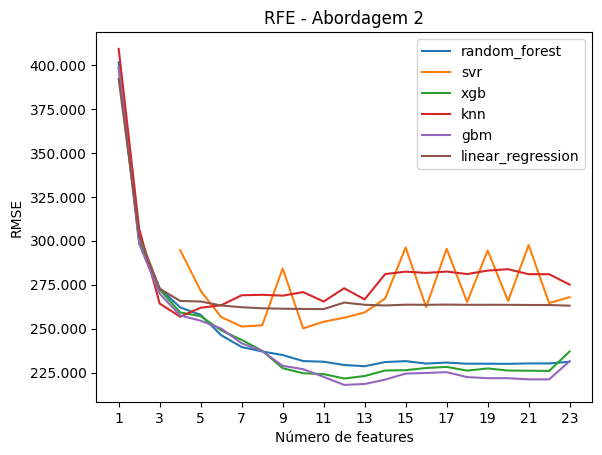

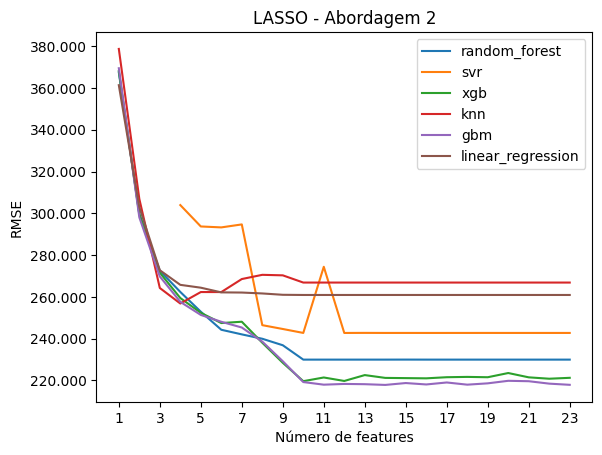

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import FuncFormatter
import locale

# Configurar a formatação de moeda
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8') 

models = ['random_forest', 'svr', 'xgb', 'knn', 'gbm', 'linear_regression']
#models = ['gbm']
methods = ["RFE", "LASSO"]

min_rmse = {}

def formatar_moeda(valor, _):
    return locale.format_string('%.0f', valor, grouping=True)

for method in methods:
    path = Path("optuna_studies_regression") / method

    for n_features in range(1, 24):
        min_values = []

        for model_name in models:
            if model_name == 'svr' and n_features < 4:
                min_values.append(None)
                continue

            df = pd.read_csv(path / f'{n_features}_{model_name}.csv')
            min_value = df['value'].min()

            min_values.append(min_value)

        min_rmse[n_features] = min_values

    # Preparando os dados para o gráfico
    quantities = list(min_rmse.keys())

    # Plotando o gráfico para cada classificador
    for i, classifier in enumerate(models):
        if classifier == 'svr':
            values = [min_rmse[q][i] if q > 3 else None for q in quantities]
        else:
            values = [min_rmse[q][i] for q in quantities]
        plt.plot(quantities, values, label=classifier)

    plt.plot(quantities, values, ls="None")
    plt.xlabel('Número de features')
    plt.ylabel('RMSE')
    plt.legend()
    plt.xticks(quantities[::2])
    plt.title(method + ' - Abordagem 2')
    formatter = FuncFormatter(formatar_moeda)
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.show()

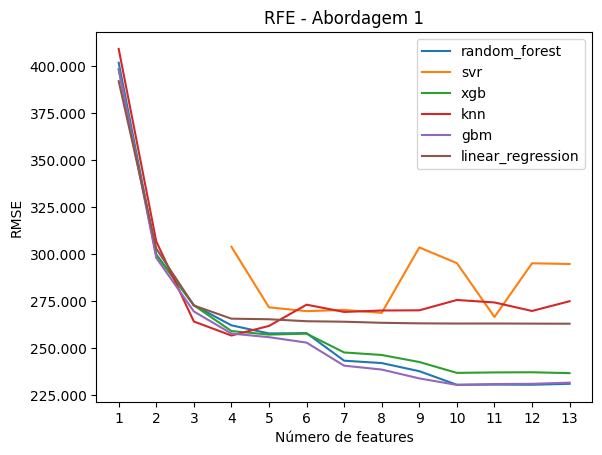

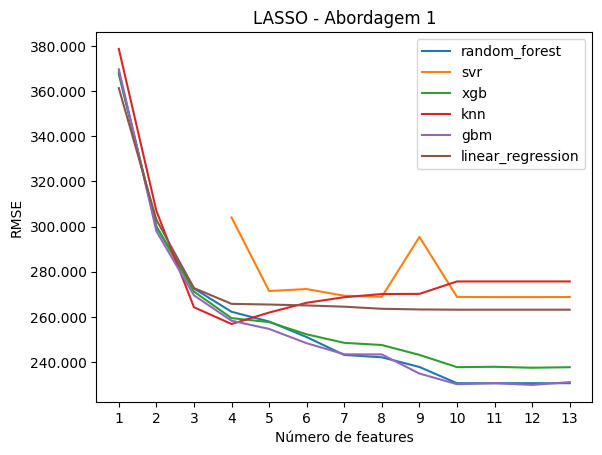

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import FuncFormatter
import locale

# Configurar a formatação de moeda
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8') 

models = ['random_forest', 'svr', 'xgb', 'knn', 'gbm', 'linear_regression']
#models = ['gbm']
methods = ["RFE", "LASSO"]

min_rmse = {}

def formatar_moeda(valor, _):
    return locale.format_string('%.0f', valor, grouping=True)

for method in methods:
    pathNoSpacial = Path("optuna_studies_regression") / 'NO_SPATIAL' / method

    for n_features in range(1, 14):
        min_values = []

        for model_name in models:
            if model_name == 'svr' and n_features < 4:
                min_values.append(None)
                continue

            df = pd.read_csv(pathNoSpacial / f'{n_features}_{model_name}.csv')
            min_value = df['value'].min()

            min_values.append(min_value)

        min_rmse[n_features] = min_values

    # Preparando os dados para o gráfico
    quantities = list(min_rmse.keys())

    # Plotando o gráfico para cada classificador
    for i, classifier in enumerate(models):
        if classifier == 'svr':
            values = [min_rmse[q][i] if q > 3 else None for q in quantities]
        else:
            values = [min_rmse[q][i] for q in quantities]
        plt.plot(quantities, values, label=classifier)

    plt.plot(quantities, values, ls="None")
    plt.xlabel('Número de features')
    plt.ylabel('RMSE')
    plt.legend()
    plt.xticks(quantities)
    plt.title(method + ' - Abordagem 1')
    formatter = FuncFormatter(formatar_moeda)
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.show()

In [35]:
import pandas as pd

# Lista dos classificadores disponíveis
classifiers = ['random_forest', 'svr', 'xgb', 'knn', 'gbm', 'linear_regression']

# Variáveis para armazenar o melhor valor de RMSE e o classificador correspondente
best_rmse = float('inf')
best_classifier = ''
n_features = ''
number = ''

methods = ["RFE", "LASSO"]

for method in methods:
    path = Path("optuna_studies_regression") / method
    # Percorrendo todos os arquivos
    for quantidade in range(1, 24):
        for classifier in classifiers:
            if classifier == 'svr' and quantidade < 4:
                # Excluir quantidades menores ou iguais a 4 para o classificador "svr"
                continue
            
            # Lendo o arquivo CSV correspondente
            filename = f'{quantidade}_{classifier}.csv'
            df = pd.read_csv(path/filename)
            
            # Encontrando o menor valor de RMSE, considerando a quantidade mínima para o "svr"
            if classifier == 'svr':
                min_value = df['value'][df['value'].notnull()].min()
            else:
                min_value = df['value'].min()
            
            # Atualizando o melhor valor de RMSE e o classificador correspondente
            if min_value < best_rmse:
                best_rmse = min_value
                number = df.loc[df['value'] == min_value, 'number'].values[0]
                n_features = quantidade
                best_classifier = classifier

    # Imprimindo o melhor valor de RMSE e o classificador correspondente
    print(f"{method} Melhor valor COM correlação espacial")
    print(f"N_features: {n_features}, linha: {number} ")
    print(f"Melhor valor de RMSE: {best_rmse}")
    print(f"Classificador correspondente: {best_classifier}")

RFE
N_features: 12, linha: 34 
Melhor valor de RMSE: 217979.7302994313
Classificador correspondente: gbm
LASSO
N_features: 14, linha: 71 
Melhor valor de RMSE: 217837.68390613125
Classificador correspondente: gbm


In [38]:
import pandas as pd

# Lista dos classificadores disponíveis
classifiers = ['random_forest', 'svr', 'xgb', 'knn', 'gbm', 'linear_regression']

# Variáveis para armazenar o melhor valor de RMSE e o classificador correspondente
best_rmse = float('inf')
best_classifier = ''
n_features = ''
number = ''

methods = ["RFE", "LASSO"]

for method in methods:
    path = Path("optuna_studies_regression") / 'NO_SPATIAL' / method
    # Percorrendo todos os arquivos
    for quantidade in range(1, 14):
        for classifier in classifiers:
            if classifier == 'svr' and quantidade < 4:
                # Excluir quantidades menores ou iguais a 4 para o classificador "svr"
                continue
            
            # Lendo o arquivo CSV correspondente
            filename = f'{quantidade}_{classifier}.csv'
            df = pd.read_csv(path/filename)
            
            # Encontrando o menor valor de RMSE, considerando a quantidade mínima para o "svr"
            if classifier == 'svr':
                min_value = df['value'][df['value'].notnull()].min()
            else:
                min_value = df['value'].min()
            
            # Atualizando o melhor valor de RMSE e o classificador correspondente
            if min_value < best_rmse:
                best_rmse = min_value
                number = df.loc[df['value'] == min_value, 'number'].values[0]
                n_features = quantidade
                best_classifier = classifier

    # Imprimindo o melhor valor de RMSE e o classificador correspondente
    print(f"{method} Melhor valor SEM correlação espacial")
    print(f"N_features: {n_features}, linha: {number} ")
    print(f"Melhor valor de RMSE: {best_rmse}")
    print(f"Classificador correspondente: {best_classifier}")

RFE Melhor valor SEM correlação espacial
N_features: 10, linha: 25 
Melhor valor de RMSE: 230534.98540347768
Classificador correspondente: gbm
LASSO Melhor valor SEM correlação espacial
N_features: 12, linha: 51 
Melhor valor de RMSE: 229831.8076178117
Classificador correspondente: gbm


In [1]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Lendo o arquivo CSV
df = pd.read_csv('dataset_imoveis_new.csv')

# Extraindo os recursos (X) e os rótulos (y)
X = df[['condominio', 'area', 'garagens', 'suites', 'iptu', 'quartos', 'farmacias_proximas', 'qtd_crimes_violentos', 'distancia_metro', 'salas', 'renda_media', 'portaria', 'supermercados_proximos', 'distancia_escola']]
y = df['preco']  # Coluna de rótulos

# Normalizando os dados usando o MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

gbm_params = {
    'n_estimators': 880,
    'learning_rate': 0.061569164821004795,
    'max_depth': 3,
}

gbm_model = GradientBoostingRegressor(**gbm_params)

# Treinando o modelo com os dados de treinamento
gbm_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = gbm_model.predict(X_test)

# Teste de predição de imoveis
# preco=720000.0
area=125
salas=3
quartos=4
suites=1
banheiros=3
andar=4.0
garagens=2
iptu=251.0
condominio=820.0
portaria=1
distancia_metro=816
espaco_social=1
piscina=1
academia=1
lat=-19.87765085
lng=-43.93067078
ranking_escola=67
distancia_escola=0.702
renda_media=2753
qtd_crimes_violentos=39
farmacias_proximas=11
supermercados_proximos=4
parques_proximos=3

# Normalizando os dados do novo imóvel
X_pred = [[condominio, area, garagens, suites, iptu, quartos, farmacias_proximas, qtd_crimes_violentos, distancia_metro, salas, renda_media, portaria, supermercados_proximos, distancia_escola]]
X_pred_scaled = scaler.transform(X_pred)

# Obtendo o valor predito para o novo imóvel
valor_predito = gbm_model.predict(X_pred_scaled)

# Imprimindo o valor predito
print("720.000 & ", valor_predito[0])

# preco=300000.0
area=90
salas=2
quartos=2
suites=0
banheiros=2
andar=2.0
garagens=1
iptu=98.17
condominio=100.0
portaria=0
distancia_metro=4957
espaco_social=0
piscina=0
academia=0
lat=-19.79779535
lng=-43.98660053
ranking_escola=53
distancia_escola=0.805
renda_media=2261
qtd_crimes_violentos=62
farmacias_proximas=3
supermercados_proximos=6
parques_proximos=0

# Normalizando os dados do novo imóvel
X_pred = [[condominio, area, garagens, suites, iptu, quartos, farmacias_proximas, qtd_crimes_violentos, distancia_metro, salas, renda_media, portaria, supermercados_proximos, distancia_escola]]
X_pred_scaled = scaler.transform(X_pred)

# Obtendo o valor predito para o novo imóvel
valor_predito = gbm_model.predict(X_pred_scaled)

# Imprimindo o valor predito
print("300.000 & ", valor_predito[0])

# preco=161000.0
area=45
salas=1
quartos=2
suites=0
banheiros=1
andar=3.0
garagens=1
iptu=29.17
condominio=180.0
portaria=0
distancia_metro=5001
espaco_social=0
piscina=1
academia=0
lat=-19.81482826
lng=-43.99394772
ranking_escola=95
distancia_escola=0.802
renda_media=1472
qtd_crimes_violentos=48
farmacias_proximas=1
supermercados_proximos=6
parques_proximos=4

# Normalizando os dados do novo imóvel
X_pred = [[condominio, area, garagens, suites, iptu, quartos, farmacias_proximas, qtd_crimes_violentos, distancia_metro, salas, renda_media, portaria, supermercados_proximos, distancia_escola]]
X_pred_scaled = scaler.transform(X_pred)

# Obtendo o valor predito para o novo imóvel
valor_predito = gbm_model.predict(X_pred_scaled)

# Imprimindo o valor predito
print("161.000 & ", valor_predito[0])

# preco=415000.0
area=110
salas=2
quartos=2
suites=1
banheiros=2
andar=4.0
garagens=1
iptu=170.0
condominio=200.0
portaria=0
distancia_metro=2356
espaco_social=0
piscina=0
academia=0
lat=-19.81455998
lng=-43.96786001
ranking_escola=26
distancia_escola=0.259
renda_media=6171
qtd_crimes_violentos=21
farmacias_proximas=4
supermercados_proximos=2
parques_proximos=5

# Normalizando os dados do novo imóvel
X_pred = [[condominio, area, garagens, suites, iptu, quartos, farmacias_proximas, qtd_crimes_violentos, distancia_metro, salas, renda_media, portaria, supermercados_proximos, distancia_escola]]
X_pred_scaled = scaler.transform(X_pred)

# Obtendo o valor predito para o novo imóvel
valor_predito = gbm_model.predict(X_pred_scaled)

# Imprimindo o valor predito
print("415.000 & ", valor_predito[0])

# preco=1750000.0
area=180
salas=4
quartos=4
suites=4
banheiros=4
andar=10.0
garagens=4
iptu=790.0
condominio=1900.0
portaria=1
distancia_metro=1268
espaco_social=1
piscina=1
academia=1
lat=-19.8915599
lng=-43.9224766
ranking_escola=66
distancia_escola=0.899
renda_media=2300
qtd_crimes_violentos=31
farmacias_proximas=6
supermercados_proximos=8
parques_proximos=12

# Normalizando os dados do novo imóvel
X_pred = [[condominio, area, garagens, suites, iptu, quartos, farmacias_proximas, qtd_crimes_violentos, distancia_metro, salas, renda_media, portaria, supermercados_proximos, distancia_escola]]
X_pred_scaled = scaler.transform(X_pred)

# Obtendo o valor predito para o novo imóvel
valor_predito = gbm_model.predict(X_pred_scaled)

# Imprimindo o valor predito
print("1.750.000 & ", valor_predito[0])

# preco=580000.0
area=115
salas=2
quartos=3
suites=1
banheiros=2
andar=1.0
garagens=2
iptu=128.33
condominio=400.0
portaria=0
distancia_metro=1252
espaco_social=0
piscina=0
academia=0
lat=-19.88645404
lng=-43.92449415
ranking_escola=5
distancia_escola=0.873
renda_media=13323
qtd_crimes_violentos=31
farmacias_proximas=9
supermercados_proximos=8
parques_proximos=7

# Normalizando os dados do novo imóvel
X_pred = [[condominio, area, garagens, suites, iptu, quartos, farmacias_proximas, qtd_crimes_violentos, distancia_metro, salas, renda_media, portaria, supermercados_proximos, distancia_escola]]
X_pred_scaled = scaler.transform(X_pred)

# Obtendo o valor predito para o novo imóvel
valor_predito = gbm_model.predict(X_pred_scaled)

# Imprimindo o valor predito
print("580.000 & ", valor_predito[0])

# preco=950000.0
area=145
salas=2
quartos=4
suites=1
banheiros=2
andar=4.0
garagens=3
iptu=392.0
condominio=890.0
portaria=1
distancia_metro=2165
espaco_social=1
piscina=1
academia=0
lat=-19.89451635
lng=-43.93161251
ranking_escola=5
distancia_escola=0.443
renda_media=13323
qtd_crimes_violentos=6
farmacias_proximas=7
supermercados_proximos=8
parques_proximos=8

# Normalizando os dados do novo imóvel
X_pred = [[condominio, area, garagens, suites, iptu, quartos, farmacias_proximas, qtd_crimes_violentos, distancia_metro, salas, renda_media, portaria, supermercados_proximos, distancia_escola]]
X_pred_scaled = scaler.transform(X_pred)

# Obtendo o valor predito para o novo imóvel
valor_predito = gbm_model.predict(X_pred_scaled)

# Imprimindo o valor predito
print("950.000 & ", valor_predito[0])

# preco=240000.0
area=42
salas=1
quartos=1
suites=1
banheiros=1
andar=7.0
garagens=1
iptu=189.0
condominio=1100.0
portaria=1
distancia_metro=1800
espaco_social=1
piscina=0
academia=1
lat=-19.89370479
lng=-43.92807716
ranking_escola=5
distancia_escola=0.514
renda_media=13323
qtd_crimes_violentos=6
farmacias_proximas=4
supermercados_proximos=10
parques_proximos=8

# Normalizando os dados do novo imóvel
X_pred = [[condominio, area, garagens, suites, iptu, quartos, farmacias_proximas, qtd_crimes_violentos, distancia_metro, salas, renda_media, portaria, supermercados_proximos, distancia_escola]]
X_pred_scaled = scaler.transform(X_pred)

# Obtendo o valor predito para o novo imóvel
valor_predito = gbm_model.predict(X_pred_scaled)

# Imprimindo o valor predito
print("240.000 & ", valor_predito[0])

# preco=4200000.0
area=420
salas=4
quartos=3
suites=2
banheiros=4
andar=0.0
garagens=4
iptu=688.33
condominio=2100.0
portaria=0
distancia_metro=2003
espaco_social=0
piscina=0
academia=0
lat=-19.933312
lng=-43.94312
ranking_escola=61
distancia_escola=0.397
renda_media=2201
qtd_crimes_violentos=50
farmacias_proximas=11
supermercados_proximos=6
parques_proximos=5

# Normalizando os dados do novo imóvel
X_pred = [[condominio, area, garagens, suites, iptu, quartos, farmacias_proximas, qtd_crimes_violentos, distancia_metro, salas, renda_media, portaria, supermercados_proximos, distancia_escola]]
X_pred_scaled = scaler.transform(X_pred)

# Obtendo o valor predito para o novo imóvel
valor_predito = gbm_model.predict(X_pred_scaled)

# Imprimindo o valor predito
print("4.200.000 & ", valor_predito[0])

# preco=1100000.0
area=68
salas=2
quartos=2
suites=2
banheiros=2
andar=0.0
garagens=2
iptu=35.5
condominio=578.0
portaria=0
distancia_metro=1482
espaco_social=0
piscina=1
academia=1
lat=-19.93197288
lng=-43.92906734
ranking_escola=31
distancia_escola=0.49
renda_media=14463
qtd_crimes_violentos=55
farmacias_proximas=20
supermercados_proximos=9
parques_proximos=8

# Normalizando os dados do novo imóvel
X_pred = [[condominio, area, garagens, suites, iptu, quartos, farmacias_proximas, qtd_crimes_violentos, distancia_metro, salas, renda_media, portaria, supermercados_proximos, distancia_escola]]
X_pred_scaled = scaler.transform(X_pred)

# Obtendo o valor predito para o novo imóvel
valor_predito = gbm_model.predict(X_pred_scaled)

# Imprimindo o valor predito
print("1.100.000 & ", valor_predito[0])

# Calculando R^2
r2 = r2_score(y_test, y_pred)

# Calculando MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Exibindo os resultados
print("R^2:", r2)
print("MAPE:", mape)

# Obtenha as importâncias das variáveis
importances = gbm_model.feature_importances_

# Crie um DataFrame para exibir as importâncias
feature_importances = pd.DataFrame({'Variável': X.columns, 'Importância': importances})
feature_importances = feature_importances.sort_values('Importância', ascending=False)

# Imprima as variáveis mais relevantes
print(feature_importances)

720.000 &  745896.8553466992
300.000 &  314134.098707073
161.000 &  189344.53638754197
415.000 &  462224.59118588414
1.750.000 &  1848240.6104072924
580.000 &  547042.9292277775
950.000 &  962666.04886278
240.000 &  361696.62935405626
4.200.000 &  4166387.536900725
1.100.000 &  1030820.7162523743
R^2: 0.8710960300721692
MAPE: 17.801048873422967
                  Variável  Importância
0               condominio     0.343776
2                 garagens     0.249202
1                     area     0.190001
3                   suites     0.065742
4                     iptu     0.046224
6       farmacias_proximas     0.025134
10             renda_media     0.021662
9                    salas     0.017423
13        distancia_escola     0.011653
8          distancia_metro     0.011238
5                  quartos     0.009533
7     qtd_crimes_violentos     0.005307
12  supermercados_proximos     0.002108
11                portaria     0.000996


c:\Users\Thiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Thiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Thiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Thiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Thiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler wa